<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [1]:
import os
print(os.getcwd())

/home/jovyan/work


In [9]:
import pandas as pd

df = pd.read_csv("/home/jovyan/work/data/datos_clientes.csv")

# Crear grupos etarios
bins = [17, 24, 34, 44, 54, 64, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Grupo_Etario'] = pd.cut(df['Edad'], bins=bins, labels=labels)


Se carga un archivo CSV con datos de clientes y se clasifica a cada uno en un grupo etario según su edad. Los grupos definidos son: 18-24, 25-34, 35-44, 45-54, 55-64 y 65+, usando rangos de edad y la función pd.cut de pandas.

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

                          Ingreso                     Puntaje_Gasto  \
                             mean           std count          mean   
Genero Grupo_Etario                                                   
Hombre 18-24         46748.482500  21515.089905    16     51.875000   
       25-34         78927.434545  32734.446993    22     62.454545   
       35-44         67001.986111  22499.533107    18     50.777778   
       45-54         58029.127143  20522.769162    14     34.357143   
       55-64         55780.227778  25094.510046     9     28.444444   
       65+           51366.806667  14577.260971     9     46.000000   
Mujer  18-24         42523.269474  19749.373173    19     59.947368   
       25-34         65815.380000  23049.652497    32     63.656250   
       35-44         66923.430000  31556.048353    24     48.416667   
       45-54         59210.614800  26541.550152    25     37.280000   
       55-64         57098.777143  20204.546850     7     37.285714   
      

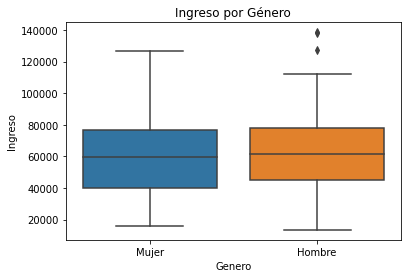

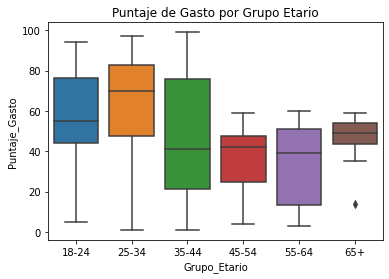

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estadísticas descriptivas
desc_stats = df.groupby(['Genero', 'Grupo_Etario'])[['Ingreso', 'Puntaje_Gasto']].agg(['mean', 'std', 'count'])
print(desc_stats)

# Visualizaciones
sns.boxplot(data=df, x='Genero', y='Ingreso')
plt.title('Ingreso por Género')
plt.show()

sns.boxplot(data=df, x='Grupo_Etario', y='Puntaje_Gasto')
plt.title('Puntaje de Gasto por Grupo Etario')
plt.show()


1. Se agrupan los datos por género y grupo etario para calcular estadísticas descriptivas de las variables Ingreso y Puntaje de Gasto: media, desviación estándar y cantidad de registros.
2. Se generan dos gráficos tipo boxplot:
Ingreso por Género: muestra la distribución del ingreso según el género.
Puntaje de Gasto por Grupo Etario: muestra cómo varía el puntaje de gasto entre los distintos rangos de edad.

##### Reflexión sobre patrones predictivos
1. El género no influye significativamente en ingreso ni gasto.
La edad sí muestra diferencias claras, especialmente en los grupos 25–34 y 35–44, que presentan mayores ingresos y puntajes de gasto.
2. Esto sugiere que la edad es un factor clave para segmentar clientes y diseñar estrategias de marketing focalizadas.

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

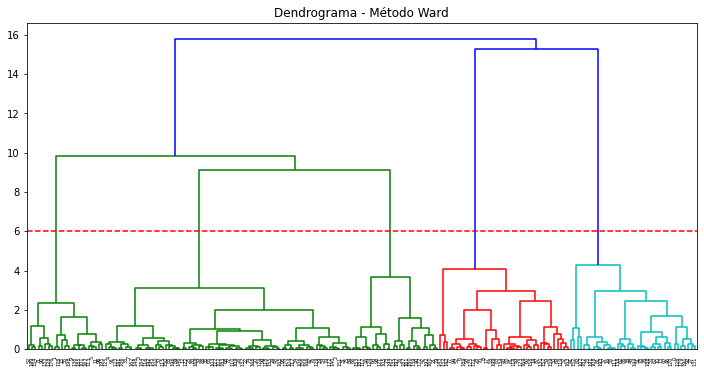

In [4]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

X = df[['Ingreso', 'Puntaje_Gasto']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.axhline(y=6, color='r', linestyle='--')
plt.title('Dendrograma - Método Ward')
plt.show()

1. Seleccionar variables: Se toman las columnas Ingreso y Puntaje_Gasto del DataFrame.
2. Estandarización: Se aplica StandardScaler para normalizar los datos y evitar que las diferencias de escala afecten el análisis.
3. Clustering jerárquico: Se utiliza el método de enlace Ward para calcular las distancias entre los puntos y formar los clusters.
4. Visualización: Se genera un dendrograma que muestra cómo se agrupan los clientes. Se traza una línea horizontal en y=6 para sugerir un posible punto de corte en la jerarquía.

#### Análisis
- Las variables Ingreso y Puntaje_Gasto tienen escalas diferentes. Estandarizarlas garantiza que ambas tengan igual peso en el cálculo de distancias, evitando que una domine el análisis.
- Número de clusters obtenidos: Se cortó el dendrograma en distancia 6, obteniendo 5 clusters.
- Estrategia de marketing sugerida
Cluster 4: Clientes con alto ingreso y alto gasto → ideal para campañas premium.
Cluster 1: Clientes con bajo ingreso pero alto gasto → potencial para fidelización y promociones.
Cluster 5: Alto ingreso pero bajo gasto → oportunidad para activar consumo con incentivos.

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

In [5]:
from scipy.cluster.hierarchy import fcluster

clusters_hier = fcluster(Z, t=6, criterion='distance')
df['Cluster_Jerarquico'] = clusters_hier


1. Se utiliza el resultado del clustering jerárquico (Z) para formar grupos cortando el dendrograma a una distancia de 6.
2. Se genera un vector de etiquetas (clusters_hier) que indica a qué cluster pertenece cada cliente.
3. Se agrega una nueva columna al DataFrame llamada Cluster_Jerarquico con estas etiquetas.

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

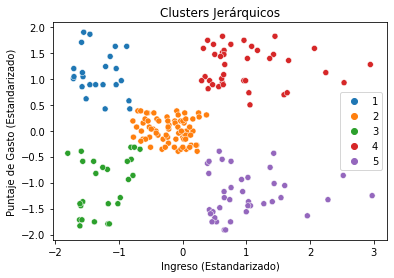

In [6]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters_hier, palette='tab10')
plt.title('Clusters Jerárquicos')
plt.xlabel('Ingreso (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.show()


Se genera un gráfico de dispersión donde:

- El eje X representa el Ingreso estandarizado.
- El eje Y representa el Puntaje de Gasto estandarizado.
- Cada punto representa un cliente.
- Los colores indican el cluster jerárquico al que pertenece cada cliente.
- Esto permite observar cómo se agrupan los clientes según sus características financieras.

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

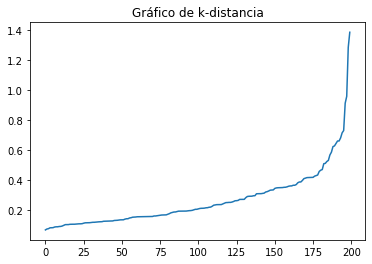

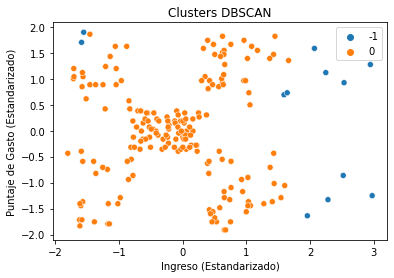

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Estimar eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title('Gráfico de k-distancia')
plt.show()

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
df['Cluster_DBSCAN'] = db_labels

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=db_labels, palette='tab10')
plt.title('Clusters DBSCAN')
plt.xlabel('Ingreso (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.show()


1. Estandarización de variables:Se normalizan las columnas Ingreso y Puntaje_Gasto para que tengan media 0 y desviación estándar 1.
2. Estimación del parámetro eps:Se calcula la distancia al 5° vecino más cercano para cada punto.
Se ordenan estas distancias y se grafican para identificar un punto de inflexión que sugiere un buen valor de eps.
3. Aplicación de DBSCAN:Se ejecuta el algoritmo con eps=0.5 y min_samples=5 y se asignan etiquetas de cluster a cada cliente. Los puntos con ruido se etiquetan como -1.
4. Visualización de resultados: Se genera un gráfico de dispersión con los datos estandarizados.Cada punto está coloreado según el cluster asignado por DBSCAN.
#### Análisis
- Justificación de parámetros: Se utilizó min_samples = 5, valor estándar que permite detectar grupos pequeños.
El gráfico de k-distancia sugiere un punto de inflexión cerca de 0.5, por lo que se eligió eps = 0.5.
- Características de los clusters: Se generó un perfil por cluster con Cantidad de clientes, Ingreso promedio y Puntaje de gasto promedio.
- Estrategia de marketing sugerida:
Los clusters con alto gasto y bajo ingreso pueden ser objetivo de promociones.
Los clusters con alto ingreso y bajo gasto podrían beneficiarse de estrategias de activación.
El ruido detectado puede representar clientes atípicos o poco relevantes para campañas.

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

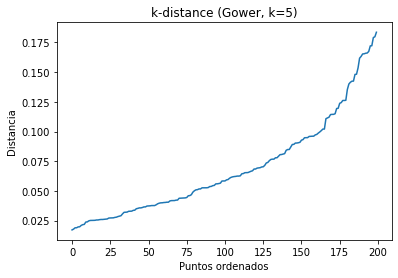

Conteo por cluster (incluye -1 ruido):
0    200
Name: Cluster_DBSCAN_Ext, dtype: int64

Perfil por cluster (sin ruido):
                   Ingreso                    Puntaje_Gasto             
                     count      mean      std         count  mean    std
Cluster_DBSCAN_Ext                                                      
0                      200  60624.45  26262.9           200  50.2  25.82

Composición por Género x Grupo_Etario (sin ruido):
Genero             Hombre                             Mujer                    \
Grupo_Etario        18-24 25-34 35-44 45-54 55-64 65+ 18-24 25-34 35-44 45-54   
Cluster_DBSCAN_Ext                                                              
0                      16    22    18    14     9   9    19    32    24    25   

Genero                        
Grupo_Etario       55-64 65+  
Cluster_DBSCAN_Ext            
0                      7   5  


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import gower
 
# === Selección de variables (2 numéricas + 2 categóricas) ===
df_mix = df[['Ingreso', 'Puntaje_Gasto', 'Genero', 'Grupo_Etario']].copy()
 
# 1) Garantizar tipos:
#   - Numéricas a float
#   - Categóricas a string (no CategoricalDtype)
df_mix['Ingreso'] = pd.to_numeric(df_mix['Ingreso'], errors='coerce')
df_mix['Puntaje_Gasto'] = pd.to_numeric(df_mix['Puntaje_Gasto'], errors='coerce')
 
df_mix['Genero'] = df_mix['Genero'].astype('string')      # o .astype(str)
df_mix['Grupo_Etario'] = df_mix['Grupo_Etario'].astype('string')
 
# Opcional: rellenar faltantes (Gower los maneja, pero DBSCAN con métrica precomputed puede agradecerlo)
df_mix['Genero'] = df_mix['Genero'].fillna('missing')
df_mix['Grupo_Etario'] = df_mix['Grupo_Etario'].fillna('missing')
 
# 2) Escalar numéricas para que tengan peso comparable (Gower ya normaliza, pero ayuda si hay outliers)
scaler = StandardScaler()
df_mix[['Ingreso', 'Puntaje_Gasto']] = scaler.fit_transform(df_mix[['Ingreso', 'Puntaje_Gasto']])
 
# 3) Indicar explícitamente cuáles columnas son categóricas
#    (mismo orden de columnas en df_mix)
cat_features = np.array([False, False, True, True])
 
# 4) Matriz de distancias de Gower (N x N)
D = gower.gower_matrix(df_mix, cat_features=cat_features)
 
# 5) Heurística de eps con k-distance (k = min_samples)
min_samples = 5
nn = NearestNeighbors(metric='precomputed', n_neighbors=min_samples)
nn.fit(D)
# Distancia al k-ésimo vecino
kdist = np.sort(nn.kneighbors(D, return_distance=True)[0][:, -1])
plt.plot(kdist)
plt.title('k-distance (Gower, k=5)')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia')
plt.show()
 
# 6) DBSCAN con métrica precomputada (ajusta eps según el "codo" de la curva anterior)
eps = 0.35  # ejemplo: si el codo cae ~0.33–0.37
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(D)
 
df['Cluster_DBSCAN_Ext'] = labels  # -1 = ruido
 
# 7) Perfilado rápido
print("Conteo por cluster (incluye -1 ruido):")
print(df['Cluster_DBSCAN_Ext'].value_counts().sort_index())
 
perfil = (df[df['Cluster_DBSCAN_Ext']!=-1]
          .groupby('Cluster_DBSCAN_Ext')[['Ingreso','Puntaje_Gasto']]
          .agg(['count','mean','std']).round(2))
print("\nPerfil por cluster (sin ruido):")
print(perfil)
 
comp = (df[df['Cluster_DBSCAN_Ext']!=-1]
        .groupby(['Cluster_DBSCAN_Ext','Genero','Grupo_Etario'])
        .size().unstack(['Genero','Grupo_Etario']).fillna(0).astype(int))
print("\nComposición por Género x Grupo_Etario (sin ruido):")
print(comp)

1. Selección de variables: Se eligen dos numéricas (Ingreso, Puntaje_Gasto) y dos categóricas (Genero, Grupo_Etario).
2. Preparación de datos:Se convierten los tipos de datos, se rellenan valores faltantes en las categóricas y Se escalan las variables numéricas para reducir el efecto de outliers.
3. Cálculo de distancias con Gower: Se genera una matriz de distancias que combina variables numéricas y categóricas.
4. Estimación de eps: Se usa el gráfico de k-distancia para identificar un valor adecuado de eps.
5. Aplicación de DBSCAN: Se ejecuta el algoritmo con la matriz de distancias precomputada y se asignan etiquetas de cluster al DataFrame.
6. Perfilado de clusters:
Se muestra el conteo de clientes por cluster.
Se calcula la media y desviación estándar de las variables numéricas por cluster.
Se analiza la composición por género y grupo etario.

#### Análisis
- Descripción de clusters
Se genera un perfil por cluster: cantidad, ingreso promedio, gasto promedio.
Se analiza la composición por género y grupo etario.
- Discusión sobre estrategia de marketing: Incorporar variables categóricas permite segmentar con más precisión, Mejora la focalización al identificar patrones demográficos dentro de cada grupo, Permite diseñar campañas específicas para perfiles como:
Mujeres jóvenes con alto gasto y Hombres mayores con bajo ingreso y gasto. 